# 🤖 **Clustering Analysis — K-Means, Agglomerative, DBSCAN, dan Hierarchical Clustering**

Pada praktikum ini kita melakukan eksplorasi menyeluruh terhadap berbagai metode *unsupervised learning*, khususnya teknik **clustering**. Tujuannya adalah memahami bagaimana setiap algoritma bekerja, bagaimana mereka membentuk kelompok (cluster), serta menilai mana yang paling sesuai untuk pola data tertentu. Karena setiap dataset memiliki pola distribusi yang berbeda, algoritma terbaik juga dapat berbeda untuk tiap jenis data. Dataset sintetis seperti `make_blobs` dan `make_moons` digunakan sebagai **alat belajar** untuk memahami karakter bentuk data yang berbeda, sehingga nantinya kita dapat memilih model yang tepat ketika bekerja dengan dataset nyata dari Kaggle berdasarkan **pola distribusi datanya**, bukan berdasarkan jenis datasetnya.

## 📘 **Alur Eksperimen**

1. **Membangun Dataset**
   - Menggunakan dua dataset sintetis:
     - `make_blobs` → cluster bulat / spherical
     - `make_moons` → cluster melengkung / non-linear
   - Visualisasi awal digunakan untuk memahami bentuk alami datanya.
   - Pola bentuk ini menjadi acuan dalam menganalisis dataset nyata: jika dataset Kaggle tampak seperti `make_blobs`, maka model seperti K-Means cocok; jika bentuknya lebih melengkung atau kompleks seperti `make_moons`, maka model seperti DBSCAN lebih sesuai.

2. **K-Means Clustering**
   - Mengelompokkan data berdasarkan jarak ke centroid.
   - Sangat baik untuk data **berbentuk bulat**, seperti `make_blobs`.
   - Dibantu *Elbow Method* untuk menentukan jumlah cluster optimal.
   - Tidak cocok untuk pola melengkung seperti `make_moons`.

3. **Agglomerative (Hierarchical) Clustering**
   - Menggabungkan titik berdasarkan jarak secara bertahap.
   - Lebih fleksibel dibanding K-Means, dan dapat bekerja cukup baik pada data terstruktur.
   - Namun, seperti K-Means, performanya menurun pada pola non-linear yang melengkung.

4. **DBSCAN (Density-Based Spatial Clustering)**
   - Menggunakan kepadatan (density) untuk mendeteksi cluster.
   - Sangat efektif untuk bentuk cluster **tidak beraturan atau melengkung**, seperti `make_moons`.
   - Tidak memerlukan jumlah cluster di awal, dan mampu mengabaikan noise secara otomatis.
   - Untuk data spherical seperti `make_blobs`, DBSCAN tidak selalu ideal karena perbedaan kepadatan antar cluster dapat kecil.

5. **Perbandingan Hasil Clustering**
   - Semua model diuji pada dataset masing-masing untuk melihat apakah cluster yang terbentuk sesuai dengan pola data.
   - Pemilihan model terbaik dilakukan **per dataset**, bukan secara keseluruhan, karena performa algoritma sangat bergantung pada bentuk distribusi data.
   - Dalam kasus data nyata Kaggle, pendekatan yang sama digunakan: **analisis bentuk distribusi data** → pilih model yang cocok (mirip make_blobs atau make_moons).

## 🏆 **Model Terbaik**
- Untuk dataset **make_blobs** (cluster bulat), model terbaik adalah **K-Means**, karena sangat cocok untuk pola spherical dan menghasilkan cluster yang bersih.
- Untuk dataset **make_moons** (cluster melengkung), model terbaik adalah **DBSCAN**, karena mampu mengikuti bentuk lengkungan secara akurat tanpa mis-cluster, sementara model lain gagal menangkap pola non-linear.
- Pendekatan ini menjadi dasar untuk memilih model terbaik pada dataset nyata: **bentuk data menentukan algoritma yang paling sesuai**.

## 🎯 **Tujuan Pembelajaran**
Melalui rangkaian kode ini, mahasiswa diharapkan:
- Memahami karakter dan kelebihan/kekurangan tiap metode clustering,
- Menyadari bahwa **algoritma terbaik bergantung pada bentuk data** yang digunakan,
- Mampu menginterpretasikan hasil clustering melalui visualisasi dan metrik pendukung,
- Mengerti prinsip bahwa *tidak ada satu algoritma yang terbaik untuk semua jenis data* (*no free lunch*),
- Memahami bahwa dataset sintetis membantu kita memahami kapan masing-masing algoritma digunakan sehingga dapat diterapkan pada dataset nyata.




# 📌 K-Means Clustering pada Dataset Buatan

Pada percobaan ini digunakan algoritma **K-Means Clustering** untuk membagi data menjadi tiga kelompok berdasarkan pola kesamaan fitur.

### Langkah-langkah:
1. **Generate dataset** menggunakan `make_blobs`, menghasilkan 150 titik dengan 3 cluster alami.
2. **Visualisasi awal** menunjukkan data mentah sebelum dikelompokkan.
3. **Melatih model K-Means** dengan menentukan jumlah cluster = 3.
4. **Menampilkan hasil clustering**:
   - Tiap cluster diberi warna berbeda.
   - Titik pusat (centroids) ditampilkan sebagai tanda bintang merah.
5. Visualisasi membantu memahami bagaimana K-Means memisahkan data berdasarkan kedekatan jarak.

Hasilnya menunjukkan bahwa K-Means mampu menemukan struktur cluster yang sudah terbentuk secara natural pada dataset.

In [12]:
from sklearn.datasets import make_blobs

# Membuat dataset dummy berbentuk cluster (150 sampel, 2 fitur, 3 cluster)
X, y = make_blobs(n_samples=150,            # Silakan diisi bagian ini dengan kode yang tepat
                  n_features=2,            # Silakan diisi bagian ini dengan kode yang tepat
                  centers=3,            # Silakan diisi bagian ini dengan kode yang tepat
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)    # Silakan diisi bagian ini dengan kode yang tepat

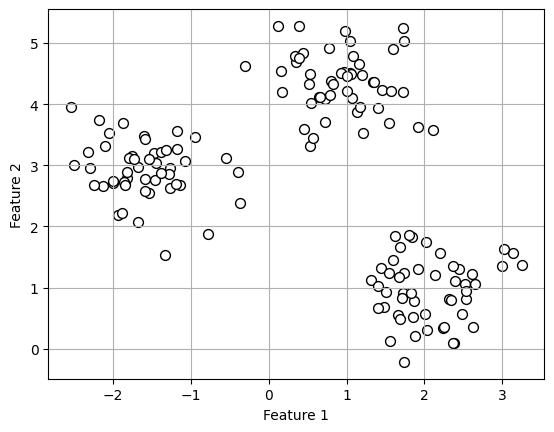

In [13]:
import matplotlib.pyplot as plt                              # Silakan diisi bagian ini dengan kode yang tepat

# Scatter plot data mentah (belum dikelompokkan)
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.xlabel('Feature 1')                                          # Silakan diisi bagian ini dengan kode yang tepat
plt.ylabel('Feature 2')                                       # Silakan diisi bagian ini dengan kode yang tepat

plt.grid()
plt.show()                                                  # Silakan diisi bagian ini dengan kode yang tepat

plt.close()                                                 # Silakan diisi bagian ini dengan kode yang tepat

In [15]:
from sklearn.cluster import KMeans

# Membuat model K-Means dengan 3 cluster
km = KMeans(n_clusters=3,          # Silakan diisi bagian ini dengan kode yang tepat
            init='random',      # inisialisasi centroid secara acak
            n_init=10,          # menjalankan K-Means 10 kali dan pilih yang terbaik
            max_iter=300,       # maksimal iterasi
            tol=1e-04,          # batas konvergensi
            random_state=0)  # Silakan diisi bagian ini dengan kode yang tepat

# Melatih model dan mendapatkan label cluster tiap titik
y_km = km.fit_predict(X)      # Silakan diisi bagian ini dengan kode yang tepat

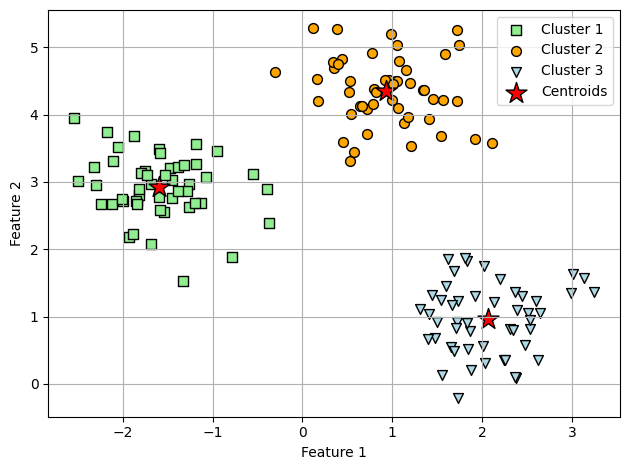

In [16]:
# Plot Cluster 1
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

# Plot Cluster 2
plt.scatter(X[y_km == 1, 0],                    # Silakan diisi bagian ini dengan kode yang tepat
            X[y_km == 1, 1],                 # Silakan diisi bagian ini dengan kode yang tepat
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')

# Plot Cluster 3
plt.scatter(X[y_km == 2, 0],                  # Silakan diisi bagian ini dengan kode yang tepat
            X[y_km == 2, 1],                # Silakan diisi bagian ini dengan kode yang tepat
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')

# Plot centroid (titik pusat cluster)
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')                         # Silakan diisi bagian ini dengan kode yang tepat
plt.ylabel('Feature 2')                           # Silakan diisi bagian ini dengan kode yang tepat

plt.legend(scatterpoints=1)
plt.grid()

plt.tight_layout()

plt.show()                                # Silakan diisi bagian ini dengan kode yang tepat

Gambar tersebut menunjukkan hasil clustering menggunakan K-Means dengan tiga cluster berbeda. Setiap warna dan bentuk marker mewakili satu kelompok: Cluster 1 (hijau), Cluster 2 (oranye), dan Cluster 3 (biru). Titik-titik dalam setiap cluster berkumpul di sekitar pusat kelompok masing-masing, yang ditandai dengan simbol bintang merah (centroids). Centroid inilah yang menjadi representasi posisi rata-rata dari titik-titik dalam cluster. Visualisasi ini menunjukkan bagaimana K-Means berhasil memisahkan data menjadi tiga kelompok yang jelas berdasarkan kemiripan pola pada dua fitur yang digunakan.

<br>

# 📉 Elbow Method untuk Menentukan Jumlah Cluster Optimal

Bagian ini menggunakan **Elbow Method** untuk menentukan jumlah cluster terbaik pada K-Means.

### Langkah-langkah:
1. Menghitung *distortion* (inertia) untuk jumlah cluster 1 hingga 10.
2. Memplot grafik Distortion vs Number of Clusters.
3. Mencari titik “elbow”, yaitu titik di mana penurunan distortion mulai melambat.

Distortion menunjukkan total jarak semua titik ke centroid masing-masing cluster.
Jumlah cluster yang baik biasanya berada pada titik siku, karena setelah itu peningkatan jumlah cluster tidak memberikan pengurangan error yang signifikan.

Elbow Method membantu memilih jumlah cluster secara objektif sebelum menjalankan K-Means secara final.


In [17]:
# Menampilkan nilai distortion (total jarak titik → centroid) dari model K-Means terakhir
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


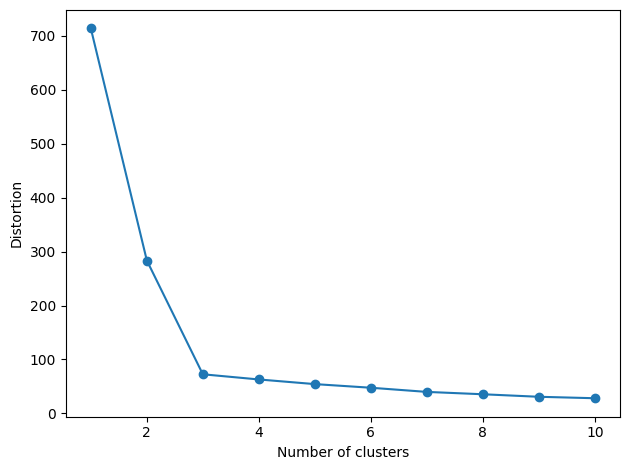

In [18]:
 # List untuk menyimpan nilai distortion tiap jumlah cluster
distortions = []

# Loop jumlah cluster dari 1 sampai 10
for i in range(1, 11):
    
    # Buat model K-Means dengan jumlah cluster = i
    km = KMeans(n_clusters=i, 
                init='k-means++',  # metode inisialisasi centroid yang lebih stabil
                n_init=10,         # K-Means dijalankan 10 kali → ambil hasil terbaik
                max_iter=300, 
                random_state=0)
    
    
    km.fit(X)                                # Silakan diisi bagian ini dengan kode yang tepat
    distortions.append(km.inertia_)             # Simpan nilai distortion (inertia) untuk cluster ke-i

# Plot elbow curve: jumlah cluster vs distortion
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()                                     # Silakan diisi bagian ini dengan kode yang tepat

Grafik tersebut menunjukkan Elbow Method, yaitu hubungan antara jumlah cluster dan nilai distortion (inertia) pada algoritma K-Means. Terlihat bahwa ketika jumlah cluster meningkat dari 1 ke 3, nilai distortion turun drastis, menunjukkan bahwa model menjadi jauh lebih baik dalam mengelompokkan data. Namun setelah titik k = 3, penurunan distortion menjadi jauh lebih lambat dan cenderung mendatar. Titik “siku” atau elbow pada grafik ini berada di sekitar k = 3, yang menandakan bahwa 3 cluster merupakan jumlah yang optimal karena menambah cluster lebih dari itu tidak memberikan peningkatan signifikan dalam kualitas clustering.

<br>

# 📊 Silhouette Analysis untuk Evaluasi K-Means

Bagian ini mengevaluasi kualitas clustering menggunakan **Silhouette Score**, yaitu ukuran seberapa baik suatu titik berada dalam clusternya (cohesion) dibandingkan cluster tetangga (separation). Nilai silhouette yang tinggi menunjukkan pemisahan cluster yang baik.

Tahapan analisis:

1. Menjalankan K-Means dengan **3 cluster**, kemudian menghitung silhouette score setiap titik.
2. Membuat **silhouette plot**, yaitu grafik horizontal yang menunjukkan distribusi nilai silhouette tiap cluster.
3. Menghitung dan menampilkan **rata-rata silhouette** sebagai garis vertikal merah.
4. Mengulangi proses untuk **2 cluster**, lalu membandingkan apakah 2 atau 3 cluster lebih baik.
5. Membuat DataFrame random sebagai contoh dataset untuk analisis lanjutan.

Silhouette analysis sangat berguna karena dapat memberi gambaran visual tentang kualitas masing-masing cluster dan membantu memilih jumlah cluster optimal.


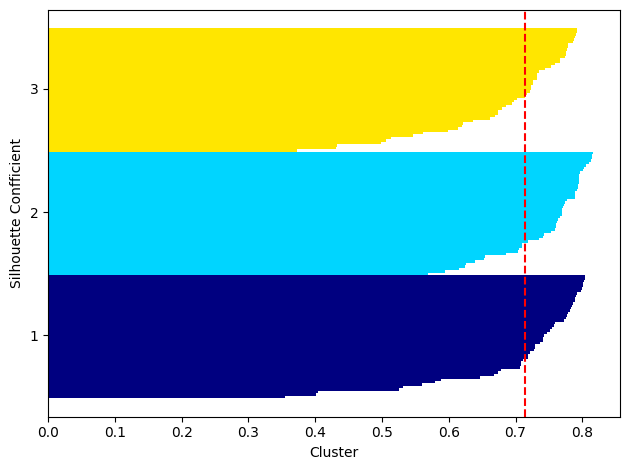

In [19]:
import numpy as np                            # Silakan diisi bagian ini dengan kode yang tepat
from matplotlib import cm
from sklearn.metrics import silhouette_samples

# Membuat model K-Means dengan 3 cluster dan inisialisasi centroid menggunakan 'k-means++'
km = KMeans(n_clusters=3,                      # Silakan diisi bagian ini dengan kode yang tepat
            init='k-means++',                    # Silakan diisi bagian ini dengan kode yang tepat
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)              # Silakan diisi bagian ini dengan kode yang tepat

# Latih model dan dapatkan label cluster
y_km = km.fit_predict(X)                      # Silakan diisi bagian ini dengan kode yang tepat

cluster_labels = np.unique(y_km)        # Menyimpan label cluster unik (misal: 0, 1, 2)
n_clusters = cluster_labels.shape[0]    # Jumlah cluster yang terbentuk

# Hitung nilai silhouette tiap titik
# - silhouette tinggi → cluster bagus
# - silhouette negatif → salah cluster
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# Variabel awal untuk mengatur posisi bar chart silhouette
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# Loop untuk menggambar silhouette per cluster
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]      # Ambil nilai silhouette khusus cluster c
    c_silhouette_vals.sort()                            # Urutkan supaya visual lebih rapi (dari kecil → besar)
    y_ax_upper += len(c_silhouette_vals)                # Update batas atas bar (jumlah sampel cluster c)
    color = cm.jet(float(i) / n_clusters)               # Warna cluster sesuai colormap
    
    # Gambar bar horizontal untuk cluster c
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    # Titik tengah cluster → untuk label Y-axis
    yticks.append((y_ax_lower + y_ax_upper) / 2.)

    # Geser batas bawah ke posisi berikutnya
    y_ax_lower += len(c_silhouette_vals)

# Hitung rata-rata silhouette seluruh titik    
silhouette_avg = np.mean(silhouette_vals)

# Garis vertikal menunjukkan kualitas cluster secara umum
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.xlabel('Cluster')                            # Silakan diisi bagian ini dengan kode yang tepat
plt.ylabel('Silhouette Confficient')                            # Silakan diisi bagian ini dengan kode yang tepat

plt.tight_layout()

plt.show()                                 # Silakan diisi bagian ini dengan kode yang tepat

Gambar tersebut merupakan silhouette plot untuk hasil clustering menggunakan K-Means dengan 3 cluster. Setiap bar horizontal menunjukkan nilai silhouette coefficient dari setiap titik dalam cluster, yang menggambarkan seberapa baik suatu titik berada di dalam clusternya (cohesion) sekaligus seberapa jauh dari cluster lain (separation). Warna berbeda mewakili cluster 1, 2, dan 3. Garis vertikal putus-putus merah menunjukkan nilai silhouette rata-rata untuk seluruh dataset. Terlihat bahwa hampir semua titik memiliki nilai silhouette di atas 0.5, yang menandakan bahwa pembagian cluster cukup baik dan terpisah dengan jelas. Silhouette plot ini membantu memastikan bahwa pemilihan jumlah cluster (k = 3) sudah cukup optimal.

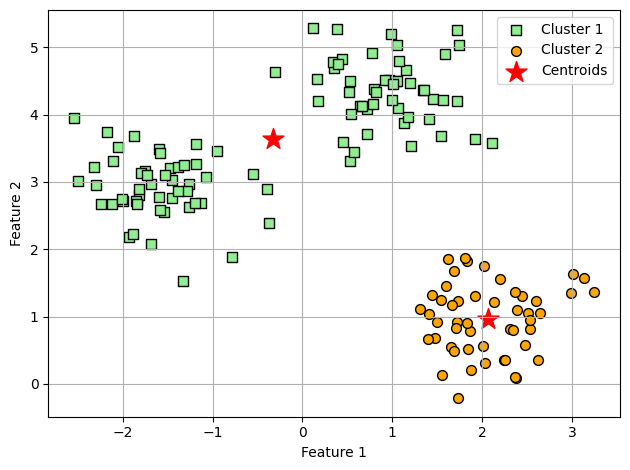

In [20]:
# Uji konfigurasi lain: apakah 2 cluster lebih baik?
km = KMeans(n_clusters=2,                              # Silakan diisi bagian ini dengan kode yang tepat
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

# Latih model dan dapatkan label cluster baru
y_km = km.fit_predict(X)                              # Silakan diisi bagian ini dengan kode yang tepat

# Plot visualisasi cluster 1 dan 2
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

# Plot centroid kedua cluster
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.grid()

plt.tight_layout()             # Silakan diisi bagian ini dengan kode yang tepat
plt.show()                    # Silakan diisi bagian ini dengan kode yang tepat
# plt.close()                   

Gambar tersebut menunjukkan hasil clustering K-Means dengan 2 cluster, di mana titik-titik hijau dan oranye masing-masing merepresentasikan dua kelompok yang terbentuk, sementara simbol bintang merah menunjukkan posisi centroid dari setiap cluster. Namun, jika diperhatikan, cluster hijau sebenarnya terdiri dari dua kelompok besar yang terpisah secara jelas, tetapi model malah memasukkan keduanya ke dalam satu cluster. Hal ini menandakan bahwa pemilihan jumlah cluster (k = 2) tidak sesuai dengan struktur data asli. Dengan kata lain, ini adalah contoh bad clustering, model gagal menangkap pola alami data karena jumlah cluster terlalu sedikit. Pendekatan yang lebih tepat adalah menggunakan k = 3, yang memang terlihat lebih sesuai dari sebaran data serta nilai silhouette dan elbow method sebelumnya.

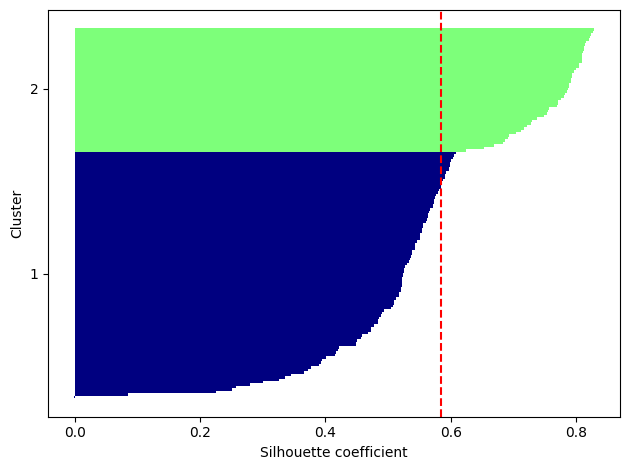

In [21]:
# label cluster = [0,1]
cluster_labels = np.unique(y_km)

# jumlah cluster = 2
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# Proses plotting silhouette sama seperti sebelumnya,
# tetapi hanya untuk 2 cluster sekarang
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()

plt.show()

Gambar di atas adalah silhouette plot untuk model K-Means dengan 2 cluster, dan ini sangat berkaitan dengan visualisasi scatter plot sebelumnya yang menunjukkan bad clustering. Pada plot ini terlihat bahwa meskipun rata-rata nilai silhouette (garis merah putus-putus) berada di sekitar 0.6  yang secara angka tampak cukup baik  distribusi nilainya memperlihatkan masalah penting: cluster biru memiliki banyak titik dengan silhouette rendah, artinya titik-titik tersebut tidak sepenuhnya cocok berada dalam cluster itu. Hal ini sesuai dengan scatter plot sebelumnya, di mana dua grup data yang seharusnya menjadi cluster terpisah malah digabung menjadi satu cluster besar. Silhouette plot ini memperkuat bukti bahwa k = 2 bukan jumlah cluster yang tepat, dan bahwa struktur data lebih cocok dipisah menjadi 3 cluster seperti yang terlihat pada hasil clustering sebelumnya.

<br>
<br>

In [22]:
import pandas as pd                               # Silakan diisi bagian ini dengan kode yang tepat
import numpy as np                                # Silakan diisi bagian ini dengan kode yang tepat

np.random.seed(123)

# Membuat dataframe random (contoh dataset)
variables = ['X', 'Y', 'Z']                          # Nama kolom
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']    # Nama baris (index)

# Membuat 5 baris × 3 kolom data acak (0–10)
X = np.random.random_sample([5, 3])*10   

# Buat DataFrame agar lebih mudah dibaca
df = pd.DataFrame(X, columns=variables, index=labels)

# Menampilkan tabel
df  

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


<br>

# 🔥 Hierarchical Clustering + Heatmap (Complete Linkage)

Bagian ini melakukan *hierarchical clustering* menggunakan metode **complete linkage**, kemudian menampilkan hasilnya sebagai:

1. **Dendrogram** – menunjukkan proses penggabungan cluster berdasarkan jarak Euclidean.
2. **Clustered Heatmap** – data diurutkan ulang mengikuti urutan cluster pada dendrogram sehingga pola antar sampel lebih mudah dilihat.

### Alur utama:
- Hitung jarak antar sampel dengan `pdist`.
- Bangun struktur hierarki dengan `linkage`.
- Tampilkan dendrogram untuk visualisasi hubungan antar cluster.
- Urutkan ulang baris dataframe sesuai dendrogram.
- Tampilkan heatmap untuk memperlihatkan pola kemiripan antar baris.

Teknik ini banyak dipakai di bioinformatika, analisis pola, dan visualisasi data multivariabel.



In [23]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import matplotlib.pyplot as plt

# Hitung jarak Euclidean antar baris data (pairwise distance)
# pdist menghasilkan vector 1D jarak semua pasangan data
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

# Membuat tabel hasil hierarchical clustering
# Tabel menunjukkan: pasangan cluster yang digabung, jarak penggabungan,
# dan jumlah item dalam cluster baru tersebut
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


<br>

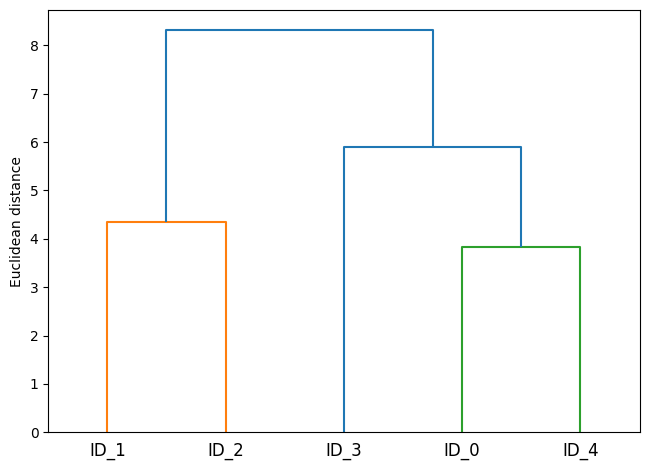

In [24]:
# Membuat dendrogram untuk menampilkan struktur hierarchical clustering
row_dendr = dendrogram(row_clusters, labels=labels)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()                           # Silakan diisi bagian ini dengan kode yang tepat


Gambar tersebut merupakan dendrogram hasil hierarchical clustering menggunakan metode complete linkage. Dendrogram ini memperlihatkan bagaimana setiap sampel atau cluster digabung secara bertahap berdasarkan jarak Euclidean. Semakin rendah posisi garis horizontal yang menghubungkan dua cabang, semakin mirip dua kelompok data tersebut. Pada gambar terlihat beberapa pasangan titik yang bergabung terlebih dahulu karena jaraknya kecil, kemudian cluster besar terbentuk di level yang lebih tinggi. Garis horizontal paling tinggi menunjukkan penggabungan terakhir, yaitu ketika semua sampel telah bergabung menjadi satu cluster besar. Visualisasi ini membantu memahami struktur pengelompokan data secara hierarkis dan menentukan berapa banyak cluster yang paling masuk akal dengan memotong dendrogram pada level jarak tertentu.

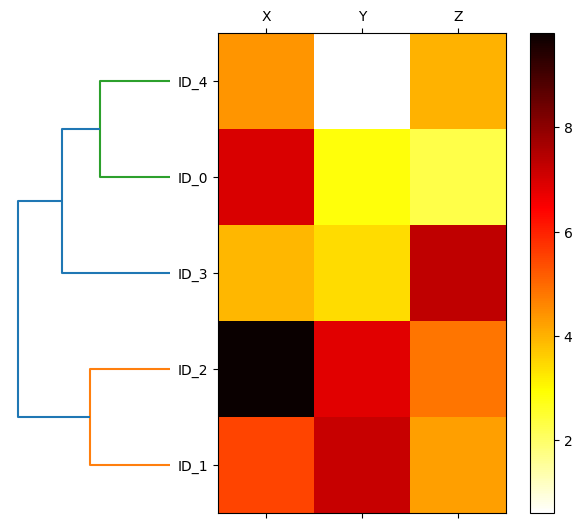

In [25]:
# Membuat figure besar untuk dendrogram + heatmap
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Area kiri: dendrogram horizontal (orientasi 'left')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

# Mengurutkan ulang data berdasarkan urutan daun dendrogram
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# Menghilangkan ticks dan frame dendrogram (agar lebih bersih)
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)

# Area kanan: heatmap untuk data yang sudah diurutkan berdasarkan cluster
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6]) 
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

# Tambahkan colorbar ke heatmap
fig.colorbar(cax)

# Menetapkan posisi tick pada sumbu X sesuai jumlah kolom dataframe
axm.set_xticks(range(len(df_rowclust.columns)))

# Menetapkan posisi tick pada sumbu Y sesuai jumlah baris dataframe
axm.set_yticks(range(len(df_rowclust.index)))                          # Silakan diisi bagian ini dengan kode yang tepat

# Memberikan label pada tick sumbu X dengan nama kolom
axm.set_xticklabels(df_rowclust.columns)                                      # Silakan diisi bagian ini dengan kode yang tepat
# Memberikan label pada tick sumbu Y dengan index baris dari dataframe
axm.set_yticklabels(df_rowclust.index)                                  # Silakan diisi bagian ini dengan kode yang tepat

plt.show()                                                             # Silakan diisi bagian ini dengan kode yang tepat

Gambar ini merupakan heatmap yang dipadukan dengan dendrogram untuk menunjukkan pola kemiripan antar baris data. Pada heatmap, setiap baris (ID_0 sampai ID_4) menampilkan nilai tiga fitur X, Y, dan Z, di mana warna gelap menunjukkan nilai tinggi dan warna terang menunjukkan nilai rendah. Misalnya, ID_2 memiliki nilai X yang sangat tinggi (warna hitam), Y cukup tinggi (merah), dan Z sedang (oranye) sehingga tampak berbeda dari baris lain, dan benar saja, pada dendrogram terlihat bahwa ID_2 membentuk cluster tersendiri bersama ID_1, karena keduanya memiliki pola yang relatif mirip dibandingkan baris lainnya. Sementara itu, ID_4 dan ID_0 saling berdekatan di dendrogram, yang menunjukkan bahwa keduanya memiliki pola fitur yang cukup mirip, terlihat misalnya dari nilai Z mereka yang sama-sama tinggi (oranye/kuning). Visual ini membantu melihat secara bersamaan: struktur pengelompokan (melalui dendrogram) dan nilai asli per fitur (melalui heatmap) sehingga pola hubungan antar data dapat diamati dengan lebih jelas.

<br>

# 🔍 Perbandingan Metode Clustering: K-Means, Agglomerative, dan DBSCAN

Pada bagian ini digunakan tiga metode clustering berbeda untuk membandingkan cara mereka mengelompokkan data:

### 1. Agglomerative Clustering (Hierarchical)
- Menggabungkan titik menjadi cluster secara bertahap.
- Menggunakan jarak Euclidean dan complete linkage.
- Cocok untuk data yang memiliki struktur hierarki.

### 2. K-Means
- Mengelompokkan data berdasarkan jarak ke centroid.
- Baik untuk data yang berbentuk bulat/terpisah jelas.
- Kurang cocok untuk bentuk data melengkung seperti "moons".

### 3. DBSCAN
- Mengelompokkan data berdasarkan kepadatan titik (density).
- Bagus untuk bentuk cluster kompleks seperti spiral atau bulan sabit.
- Bisa mendeteksi outlier.

Visualisasi memperlihatkan bahwa:
- **K-Means gagal** memisahkan data moons dengan benar.
- **Agglomerative Clustering bekerja lebih baik**.
- **DBSCAN paling cocok** untuk pola data yang melengkung.

Setiap metode memberikan hasil berbeda tergantung struktur data.


In [26]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

# Membuat model hierarchical clustering (agglomerative) dengan 3 cluster, metric Euclidean, dan linkage 'complete'
ac = AgglomerativeClustering(n_clusters=3,      # Silakan diisi bagian ini dengan kode yang tepat
                             metric="euclidean",    # Silakan diisi bagian ini dengan kode yang tepat
                             linkage="complete"     # Silakan diisi bagian ini dengan kode yang tepat
                            )

# Melatih model dan menghasilkan label cluster untuk setiap titik pada X
labels = ac.fit_predict(X)               # Silakan diisi bagian ini dengan kode yang tepat
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


<br>
<br>

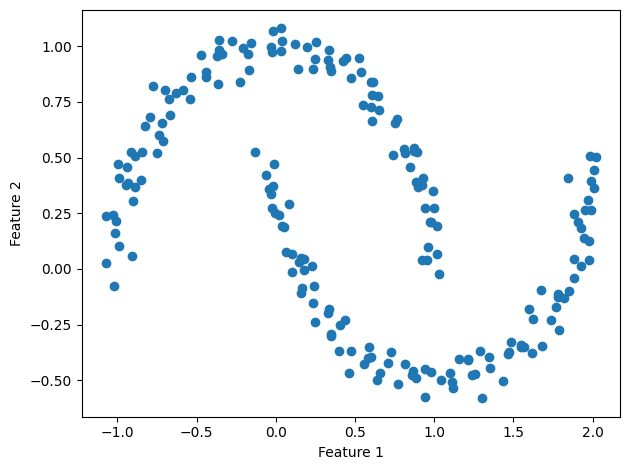

In [28]:
from sklearn.datasets import make_moons

# Membuat dataset 2D berbentuk "moons" (bentuk bulan sabit)
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Visualisasi data moons sebelum clustering
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel('Feature 1')        # Silakan diisi bagian ini dengan kode yang tepat
plt.ylabel('Feature 2')        # Silakan diisi bagian ini dengan kode yang tepat

plt.tight_layout()             # Silakan diisi bagian ini dengan kode yang tepat

plt.show()             # Silakan diisi bagian ini dengan kode yang tepat

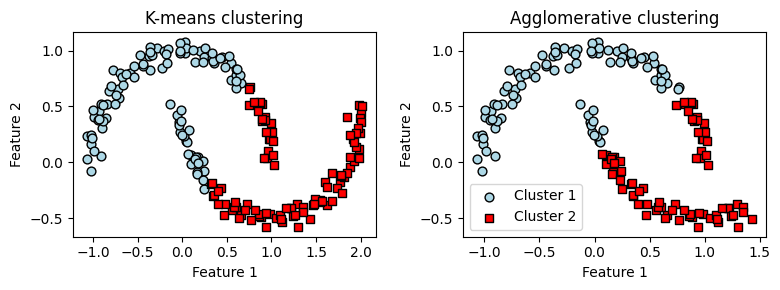

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# K-Means mencoba membagi data menjadi 2 cluster secara berbasis centroid
km = KMeans(n_clusters=2, random_state=0)          # Silakan diisi bagian ini dengan kode yang tepat

y_km = km.fit_predict(X)                          # Silakan diisi bagian ini dengan kode yang tepat

# Plot cluster 1 hasil K-Means
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')

# Plot cluster 2 hasil K-Means
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ax1.set_xlabel('Feature 1')              # Silakan diisi bagian ini dengan kode yang tepat
ax1.set_ylabel('Feature 2')              # Silakan diisi bagian ini dengan kode yang tepat

# Membuat model hierarchical clustering (agglomerative) dengan 3 cluster, metric Euclidean, dan linkage 'complete'
ac = AgglomerativeClustering(n_clusters=3,         # Silakan diisi bagian ini dengan kode yang tepat
                             metric='euclidean',       # Silakan diisi bagian ini dengan kode yang tepat
                             linkage='complete')       # Silakan diisi bagian ini dengan kode yang tepat

# Melakukan clustering hierarkis dengan metode complete linkage
y_ac = ac.fit_predict(X)                          # Silakan diisi bagian ini dengan kode yang tepat

# Plot cluster 1 versi Agglomerative
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')

# Plot cluster 2 versi Agglomerative
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

ax2.set_xlabel('Feature 1')                                # Silakan diisi bagian ini dengan kode yang tepat
ax2.set_ylabel('Feature 2')                                # Silakan diisi bagian ini dengan kode yang tepat

plt.legend()
plt.tight_layout()                                     # Silakan diisi bagian ini dengan kode yang tepat

plt.show()                                     # Silakan diisi bagian ini dengan kode yang tepat

Gambar ini memperlihatkan hasil clustering menggunakan K-Means dan Agglomerative Clustering pada dataset make_moons, yang memiliki pola dua lengkungan berbentuk bulan sabit. Pada sisi kiri, K-Means terlihat kesulitan mengikuti bentuk data, meskipun berhasil memisahkan sebagian besar titik, masih terdapat beberapa titik pada bagian ujung lengkungan yang salah kelompok karena batas cluster yang cenderung lurus. Pada sisi kanan, Agglomerative Clustering memberikan pemisahan yang lebih baik, tetapi tetap belum sempurna, masih tampak beberapa titik pada bagian pertemuan lengkungan yang salah prediksi. Kedua plot menunjukkan bahwa meskipun Agglomerative lebih sesuai dibanding K-Means untuk pola melengkung, keduanya belum mampu menangkap struktur data secara sempurna, dan algoritma seperti DBSCAN biasanya lebih efektif untuk pola non-linear seperti ini.

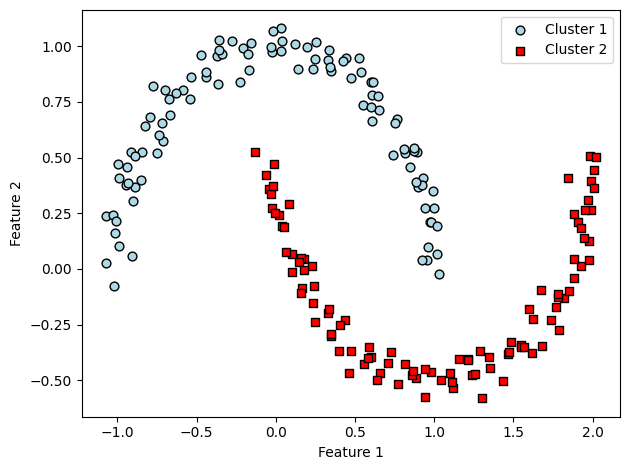

In [32]:
from sklearn.cluster import DBSCAN

# Membuat model DBSCAN dengan eps=0.2 dan min_samples=5 menggunakan metric Euclidean
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')                  # Silakan diisi bagian ini dengan kode yang tepat

# Menghasilkan cluster berdasarkan density (kepadatan titik)
y_db = db.fit_predict(X)                                             # Silakan diisi bagian ini dengan kode yang tepat

# Plot cluster DBSCAN (cluster 1)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')

# Plot cluster DBSCAN (cluster 2)
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')

plt.xlabel('Feature 1')                                                # Silakan diisi bagian ini dengan kode yang tepat
plt.ylabel('Feature 2')                                                # Silakan diisi bagian ini dengan kode yang tepat

plt.legend()
plt.tight_layout()                                                     # Silakan diisi bagian ini dengan kode yang tepat

plt.show()                                                     # Silakan diisi bagian ini dengan kode yang tepat

Gambar ini menunjukkan hasil clustering menggunakan DBSCAN pada dataset make_moons, yang memiliki pola dua lengkungan melengkung seperti bulan sabit. Berbeda dengan K-Means dan Agglomerative yang cenderung salah memisahkan beberapa titik, DBSCAN mampu mengikuti bentuk alami cluster secara presisi, menghasilkan pemisahan dua kelompok yang sangat rapi tanpa titik salah prediksi yang terlihat. Hal ini terjadi karena DBSCAN tidak mengasumsikan bentuk cluster tertentu dan bekerja dengan mendeteksi kepadatan data (density-based), sehingga sangat cocok untuk pola non-linear. Gambar ini menunjukkan bahwa DBSCAN merupakan metode yang efektif untuk data dengan bentuk kompleks atau melengkung.

<br>
<br>